# Random Effects

A variable with random effects reflects our **uncertainty** when we **haven't conditioned on all the relevant factors** - if we could measure and control for everything that matters, the effect would be fixed, but since we can't, we model our incomplete knowledge as **randomness**.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide11.png)

# Key Formula

Under the single marker linear regression, instead of the fixed value of $\beta$ as we discussed in [OLS](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html), in the **random effect model**, we acknowledge that we haven't conditioned on all relevant factors that influence the genetic effect:

$$
\mathbf{Y}=\mathbf{X}\beta+\boldsymbol{\epsilon}, \beta \sim N(\beta_0, \sigma_0^2)
$$

- $\mathbf{Y}$ is the $N \times 1$ vector of trait values for $N$ individuals
- $\mathbf{X}$ is the $N \times 1$ vector of the genotype vector for a single variant across $N$ individuals
- $\beta$ is the random effect that captures our uncertainty due to incomplete conditioning - if we could measure all factors affecting this variant's impact (population background, environmental interactions, etc.), $\beta$ would be fixed, but since we can't, we model it as drawn from $N(\beta_0, \sigma_0^2)$
- $\epsilon$ is the $N \times 1$ vector of error terms for $N$ individuals and $\epsilon \sim N(0, \sigma^2)$

# Technical Details

The core question is not whether we *should* condition on all factors, but that we **cannot** - there are always unknown factors affecting genetic effects, making random effects the realistic choice.

## Fixed Effects Model

$$
\mathbf{Y} = \mathbf{X}\beta + \boldsymbol{\epsilon}
$$

Assumes $\beta$ is constant across all contexts - this would only be true if we could condition on every single factor that influences the genetic effect:
- Population structure, environmental exposures, gene-gene interactions, developmental timing
- **Problem**: There are always unknown factors we haven't even discovered yet
- **Key insight**: When we can condition on most major factors, **fixed effects models are simpler and more powerful**. The justification depends on **careful covariate selection**.
- **Flexibility**: GWAS summary statistics from fixed effects can also be reanalyzed using **random effects models** (including Bayesian mixture approaches) to account for heterogeneity when needed.

## Random Effects Model

$$
\mathbf{Y} = \mathbf{X}\beta + \boldsymbol{\epsilon}, \quad \beta \sim N(\beta_0, \sigma_0^2)
$$

Acknowledges the reality that $\beta$ varies because **there will always be unmeasured factors**:
- Environmental factors we didn't think to measure
- Population stratification we haven't detected
- Gene-environment interactions we don't know exist
- Biological processes we haven't discovered yet

## Key Insight

$$
\text{Perfect conditioning} \rightarrow \text{Fixed effects}
$$

$$
\text{Incomplete conditioning} \rightarrow \text{Random effects}
$$

However, 

$$
\text{Unknown factors always exist} \rightarrow \text{Random effects are more reasonable}
$$

In practice, we can never achieve complete conditioning because we don't even know what all the relevant factors are. Random effects models honestly acknowledge this fundamental limitation - there's always something affecting genetic effects that we haven't accounted for.

## Related Topics
- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)
- [summary statistics](https://statfungen.github.io/statgen-primer/summary_statistics.html)
- [confounder](https://statfungen.github.io/statgen-primer/confounder.html)
- [Bayes rule](https://statfungen.github.io/statgen-primer/Bayes_rule.html)
- [Bayesian mixture model](https://statfungen.github.io/statgen-primer/Bayesian_mixture_model.html)

# Example

## Example 1 -- Individual-Level Random Effects Simulation

What happens when we acknowledge that genetic effects aren't the same for everyone? Let's see this in action using the same 5 individuals, but now allowing each person to have their own unique genetic effect size.

Instead of assuming one fixed effect for everyone, we'll draw each person's genetic effect from a distribution. This captures the reality that the same variant might have slightly different impacts across individuals due to all the factors we can't measure or don't even know about.

In [1]:
# Clear the environment
rm(list = ls())
set.seed(11)
# Define genotypes for 5 individuals at 3 variants
# These represent actual alleles at each position
# For example, Individual 1 has genotypes: CC, CT, AT
genotypes <- c(
 "CC", "CT", "AT",  # Individual 1
 "TT", "TT", "AA",  # Individual 2
 "CT", "CT", "AA",  # Individual 3
 "CC", "TT", "AA",  # Individual 4
 "CC", "CC", "TT"   # Individual 5
)
# Reshape into a matrix
N = 5
M = 3
geno_matrix <- matrix(genotypes, nrow = N, ncol = M, byrow = TRUE)
rownames(geno_matrix) <- paste("Individual", 1:N)
colnames(geno_matrix) <- paste("Variant", 1:M)

alt_alleles <- c("T", "C", "T")

# Convert to raw genotype matrix using the additive / dominant / recessive model
Xraw_additive <- matrix(0, nrow = N, ncol = M) # dount number of non-reference alleles

rownames(Xraw_additive) <- rownames(geno_matrix)
colnames(Xraw_additive) <- colnames(geno_matrix)

for (i in 1:N) {
  for (j in 1:M) {
    alleles <- strsplit(geno_matrix[i,j], "")[[1]]
    Xraw_additive[i,j] <- sum(alleles == alt_alleles[j])
  }
}

X <- scale(Xraw_additive, center = TRUE, scale = TRUE)

Let's assume that the first variant is the true causal variant and its $\beta$ comes from a normal distribution $N(0,1)$, while the error term comes from a distribution $N(0,0.3)$, then the observed trait value would be:

In [2]:
beta <- rnorm(N, mean = 0, sd = 1)
epsilon <- rnorm(N, mean = 0, sd = 0.3)
Y <- X[, 1] * beta + epsilon

Here the beta actually comes from a distribution and has different values for each individuals:

In [3]:
beta

[1] -0.59103110  0.02659437 -1.51655310 -1.36265335  1.17848916

## Example 2 -- APOE $\varepsilon4$ and Alzheimer's Disease

Let's use a real-world example to understand when genetic effects should be treated as fixed versus random. Consider the APOE $\varepsilon4$ variant, one of the strongest known genetic risk factors for Alzheimer's disease.

**Why APOE $\varepsilon4$ Effects Vary?**

Imagine you're studying APOE $\varepsilon4$'s effect on Alzheimer's risk. The key insight is that this effect isn't the same for everyone - it depends on factors we may or may not have measured.

**When would APOE $\varepsilon4$ have a "fixed" effect?** Only if we've conditioned on all the key factors:
- **Ancestry**: European populations show strong APOE $\varepsilon4$ effects, while some other populations show weaker associations
- **Age**: APOE $\varepsilon4$ barely affects risk before age 65, but has large effects in older adults  
- **Sex**: Alzheimer's affects women twice as often as men, and APOE $\varepsilon4$ effects differ by sex
- ...

If we study only elderly European women (and very likely a lot of other factors fixed), we might see a consistent APOE $\varepsilon4$ effect - making it reasonable to treat as "fixed."

**But what happens when we don't condition properly?** If our study includes mixed ancestry, all ages, and both sexes without accounting for these differences, we may see wildly varying APOE $\varepsilon4$ effects:
- Europeans: large effect size
- Hispanics: moderate effect size  
- Young people: tiny effect size
- Elderly: large effect size
- And so on...

Now APOE $\varepsilon4$'s effect looks "random" - but it's not truly random, it's just that we haven't conditioned on the factors that determine the effect size.


In this R example we just assume that there is no other factor (which is very unlikely to be true) in this model, and conduct two analysis:

In [4]:
# Clear environment and set seed for reproducibility
rm(list = ls())
set.seed(11)

# Create a diverse study population
N <- 1000

# Generate population characteristics
ancestry <- sample(c("European", "Hispanic", "African", "Asian"), N, replace = TRUE, 
                  prob = c(0.4, 0.3, 0.2, 0.1))
age <- sample(50:85, N, replace = TRUE)
sex <- sample(c("Female", "Male"), N, replace = TRUE, prob = c(0.6, 0.4))

# Generate APOEe4 genotypes (0, 1, or 2 copies)
APOEe4_copies <- sample(0:2, N, replace = TRUE, prob = c(0.7, 0.25, 0.05))

# The "true" APOEe4 effect depends on all these factors
# Base effect sizes by ancestry
base_effect <- ifelse(ancestry == "European", 1.2,
              ifelse(ancestry == "Hispanic", 0.8,
              ifelse(ancestry == "African", 0.6, 0.9)))

# Age modifier (stronger effect in elderly)
age_modifier <- ifelse(age >= 65, 1.5, 0.3)

# Sex modifier (stronger in females)
sex_modifier <- ifelse(sex == "Female", 1.3, 1.0)

# Calculate individual-specific effect sizes
true_effect <- base_effect * age_modifier * sex_modifier

# Generate Alzheimer's risk (log-odds scale)
risk_score <- APOEe4_copies * true_effect + rnorm(N, 0, 0.5)

# Create dataframe
study_data <- data.frame(
  id = 1:N,
  ancestry = ancestry,
  age = age,
  sex = sex,
  APOEe4_copies = APOEe4_copies,
  true_effect = true_effect,
  risk_score = risk_score
)

In [5]:
# Scenario 1: FIXED EFFECTS - Properly conditioned
# Analyze only elderly European females (well-conditioned subset)
conditioned_data <- subset(study_data, ancestry == "European" & age >= 65 & sex == "Female")

cat("=== FIXED EFFECTS SCENARIO ===\n")
cat("Analyzing elderly European females only\n")
cat("Sample size:", nrow(conditioned_data), "\n")

fixed_model <- lm(risk_score ~ APOEe4_copies, data = conditioned_data)
cat("APOEe4 effect estimate:", round(coef(fixed_model)[2], 3), "\n")
cat("Standard error:", round(summary(fixed_model)$coefficients[2,2], 3), "\n")
cat("Effect variation (SD across individuals):", round(sd(conditioned_data$true_effect), 3), "\n\n")

=== FIXED EFFECTS SCENARIO ===
Analyzing elderly European females only
Sample size: 135 
APOEe4 effect estimate: 2.399 
Standard error: 0.066 
Effect variation (SD across individuals): 0 



In [6]:
# Scenario 2: RANDOM EFFECTS - Poorly conditioned  
# Analyze the full diverse population without conditioning
cat("=== RANDOM EFFECTS SCENARIO ===\n")
cat("Analyzing full diverse population without conditioning\n")
cat("Sample size:", nrow(study_data), "\n")

unconditioned_model <- lm(risk_score ~ APOEe4_copies, data = study_data)
cat("APOEe4 effect estimate:", round(coef(unconditioned_model)[2], 3), "\n")
cat("Standard error:", round(summary(unconditioned_model)$coefficients[2,2], 3), "\n")
cat("Effect variation (SD across individuals):", round(sd(study_data$true_effect), 3), "\n\n")


=== RANDOM EFFECTS SCENARIO ===
Analyzing full diverse population without conditioning
Sample size: 1000 
APOEe4 effect estimate: 1.076 
Standard error: 0.038 
Effect variation (SD across individuals): 0.738 



In [8]:
# Show the heterogeneity we're missing
effect_by_group <- aggregate(true_effect ~ ancestry + sex + (age >= 65), 
                           data = study_data, FUN = mean)
colnames(effect_by_group) <- c("Ancestry", "Sex", "Elderly", "Mean_Effect")

In [9]:
effect_by_group

Ancestry,Sex,Elderly,Mean_Effect
<chr>,<chr>,<lgl>,<dbl>
African,Female,FALSE,0.234
Asian,Female,FALSE,0.351
European,Female,FALSE,0.468
Hispanic,Female,FALSE,0.312
African,Male,FALSE,0.180
Asian,Male,FALSE,0.270
European,Male,FALSE,0.360
Hispanic,Male,FALSE,0.240
African,Female,TRUE,1.170


The 'randomness' isn't truly random - it reflects our failure to condition on ancestry, age, and sex! But if we don't measure and condition on these factors, the effect appears random from our perspective.

**Even worse**: There are always factors we don't even know about yet. Maybe APOE $\varepsilon4$ effects also depend on:
- Specific dietary patterns we haven't discovered
- Interactions with other genes we haven't identified  
- Environmental exposures we haven't thought to measure
- Biological pathways we don't understand yet

This is why random effects models are often more realistic - they acknowledge that no matter how careful we are, there are always unmeasured factors creating heterogeneity in genetic effects. The "randomness" captures our incomplete knowledge, not true biological randomness.

# Supplementary

## Graphical Summary

In [5]:
library(ggplot2)
library(gridExtra)

# Set up data for 5 individuals
individuals <- 1:5
fixed_effect <- 0.5  # Same effect for all individuals
set.seed(42)
random_effects <- rnorm(5, mean = 0.5, sd = 0.15)  # Random effects around 0.5

# Create data frames
fixed_data <- data.frame(
  individual = individuals,
  effect = rep(fixed_effect, 5)
)

random_data <- data.frame(
  individual = individuals,
  effect = random_effects
)

# Fixed Effects Plot
p1 <- ggplot(fixed_data, aes(x = individual, y = effect)) +
  geom_hline(yintercept = 0, color = "gray40", linewidth = 1.5) +
  geom_hline(yintercept = fixed_effect, linetype = "dashed", 
             color = "red", linewidth = 2) +
  geom_point(color = "steelblue", size = 7, alpha = 0.9) +
  geom_line(color = "steelblue", linewidth = 3) +
  annotate("text", x = 0.5, y = fixed_effect + 0.05, 
           label = expression(beta), 
           color = "red", size = 6, fontface = "bold") +
  labs(x = "Individual", y = "Genetic Effect", 
       title = "Fixed Effects Model") +
  scale_x_continuous(breaks = 1:5) +
  ylim(0, 1) +
  theme_minimal(base_size = 18) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 20, face = "bold"),
    axis.text = element_text(size = 16),
    axis.ticks = element_blank()
  )

# Random Effects Plot
p2 <- ggplot(random_data, aes(x = individual, y = effect)) +
  geom_hline(yintercept = 0, color = "gray40", linewidth = 1.5) +
  geom_hline(yintercept = 0.5, linetype = "dashed", 
             color = "red", linewidth = 2) +
  geom_point(color = "orange", size = 7, alpha = 0.9) +
  geom_line(color = "orange", linewidth = 3) +
  annotate("text", x = 0.5, y = 0.55, 
           label = expression(beta[0]), 
           color = "red", size = 6, fontface = "bold") +
  labs(x = "Individual", y = "Genetic Effect", 
       title = "Random Effects Model") +
  scale_x_continuous(breaks = 1:5) +
  ylim(0, 1) +
  theme_minimal(base_size = 18) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 20, face = "bold"),
    axis.text = element_text(size = 16),
    axis.ticks = element_blank()
  )

# Add distribution curve to random effects plot
x_curve <- seq(0, 1, length.out = 100)
y_curve <- dnorm(x_curve, mean = 0.5, sd = 0.15)
# Scale and shift the curve to fit on the right side (further away)
y_curve_scaled <- (y_curve / max(y_curve)) * 1.5 + 6.5  # Scale to fit x-axis range, moved further right

curve_data <- data.frame(x = y_curve_scaled, y = x_curve)

# Enhanced Random Effects Plot with distribution
p2 <- ggplot(random_data, aes(x = individual, y = effect)) +
  geom_hline(yintercept = 0, color = "gray40", linewidth = 1.5) +
  geom_hline(yintercept = 0.5, linetype = "dashed", 
             color = "red", linewidth = 2) +
  geom_point(color = "orange", size = 7, alpha = 0.9) +
  geom_line(color = "orange", linewidth = 3) +
  # Add distribution curve
  geom_path(data = curve_data, aes(x = x, y = y), 
            color = "purple", linewidth = 2, alpha = 0.7) +
  annotate("text", x = 0.5, y = 0.55, 
           label = expression(beta[0]), 
           color = "red", size = 6, fontface = "bold") +
  annotate("text", x = 7.2, y = 0.7, 
           label = expression(beta %~% N(beta[0], sigma[0]^2)), 
           color = "purple", size = 5, fontface = "bold") +
  labs(x = "Individual", y = "Genetic Effect", 
       title = "Random Effects Model") +
  scale_x_continuous(breaks = 1:5, limits = c(0.5, 8.5)) +
  ylim(0, 1) +
  theme_minimal(base_size = 18) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 20, face = "bold"),
    axis.text = element_text(size = 16),
    axis.ticks = element_blank()
  )


Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"


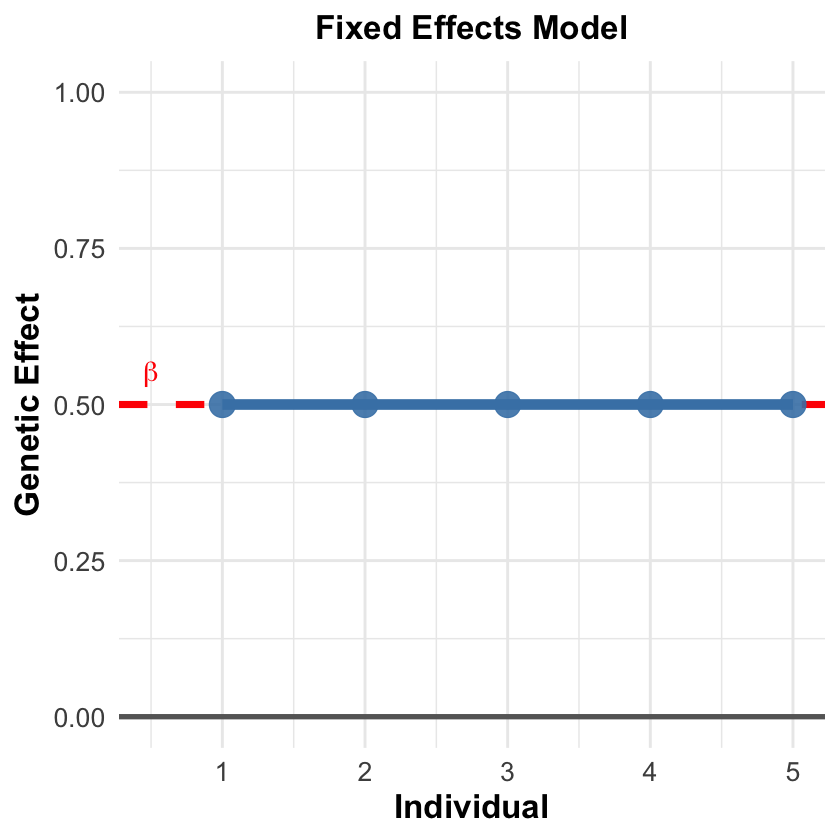

In [6]:
p1

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"


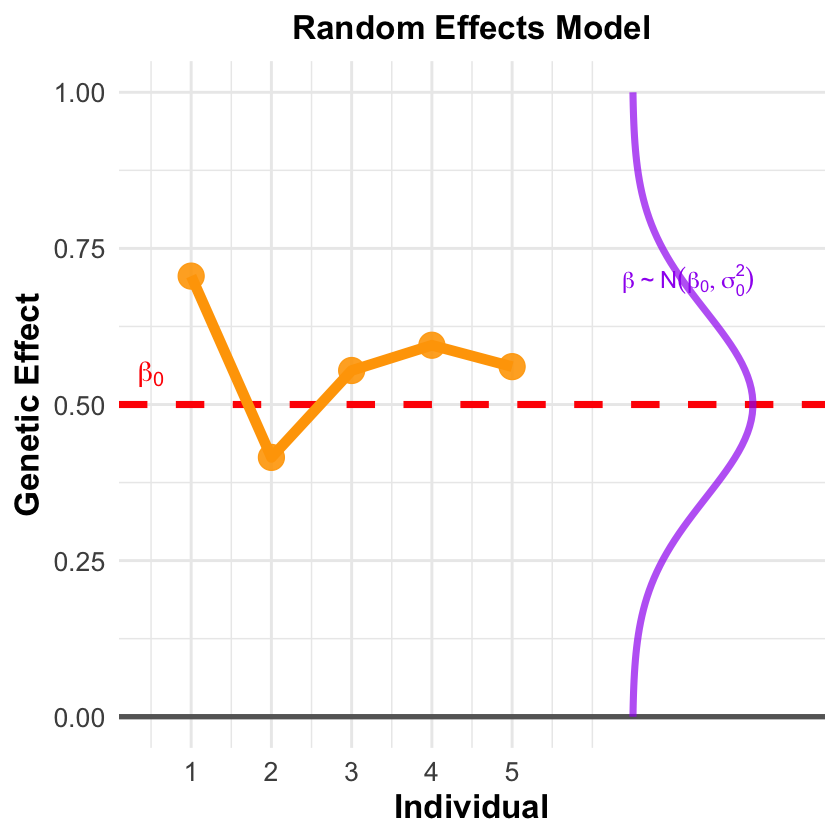

In [7]:
p2

In [8]:

# Save individual plots
ggsave("./cartoons/random_effects_fixed.png", plot = p1, 
       width = 8, height = 6, 
       bg = "transparent", 
       dpi = 300)

ggsave("./cartoons/random_effects_random.png", plot = p2, 
       width = 10, height = 6, 
       bg = "transparent", 
       dpi = 300)

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"
